# Data Modeling
**Housing Market Data**

- S&P Case-Shiller Home Price Index: This index tracks home price changes nationally.

**Economic Indicators**

- Gross Domestic Product (GDP): Data from the Bureau of Economic Analysis (BEA) can help understand the overall economic health.
- Unemployment Rate: Bureau of Labor Statistics (BLS) offers data on national employment rates.
- Interest Rates: Data from the Federal Reserve on mortgage rates.
  
**Demographic Information**

- U.S. Census Bureau: Provides population, migration data.
- Household Income: Median household income data can be found through the U.S. Census Bureau or the American Community Survey.

**Housing Supply and Demand**

- Homeownership Rate: Also available from the U.S. Census Bureau.

**Inflation Data**

- Consumer Price Index (CPI): Data on inflation trends, which can impact purchasing power and home prices.

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [2]:
df = pd.read_csv('us-home-data.csv')

In [3]:
df.shape

(50112, 16)

In [4]:
df.sample(10)

,ownership_day,mortgage_day,ownership_month,mortgage_month,case_shiller_month,year,gdp_billion,gdp_per_capita,population_million,immigrants_million,ownership_rate,median_income,inflation_rate,mortgage,unemp_rate,case_shiller_value
25646,4,28,1,3,3,2013,16843.19099,53291.1277,319.375166,41.3481,65.0,65740,1.4648,3.57,7.37,149.963
43827,1,2,1,7,4,2020,21060.47361,63528.6343,335.942003,45.0856,65.3,76660,1.2336,3.07,8.05,216.803
10013,7,28,1,12,6,2006,13815.58695,46302.0009,299.753098,34.4558,69.0,67520,3.2259,6.18,4.62,183.507
25147,10,10,1,1,8,2013,16843.19099,53291.1277,319.375166,41.3481,65.2,65740,1.4648,3.40,7.37,156.965
32553,1,31,1,12,10,2015,18206.02074,56762.7295,324.607776,43.2904,63.7,68410,0.1186,4.01,5.28,174.792
42431,10,5,1,12,12,2019,21380.97612,65120.3947,334.319671,44.9329,65.1,78250,1.8122,3.68,3.67,213.938
535,1,21,1,3,8,2003,11456.44204,39490.2750,291.109820,31.9552,68.0,65860,2.2701,5.79,5.99,134.969
39542,10,11,1,10,3,2018,20533.05731,62823.3094,332.140037,44.7287,64.8,73030,2.4426,4.90,3.90,199.954
11232,1,28,1,6,1,2007,14474.22691,48050.2238,302.743399,35.9554,68.4,68610,2.8527,6.67,4.62,184.517
14422,4,2,1,10,11,2008,14769.85791,48570.0460,305.694910,37.8558,68.1,66280,3.8391,6.10,5.78,156.142


<Axes: >

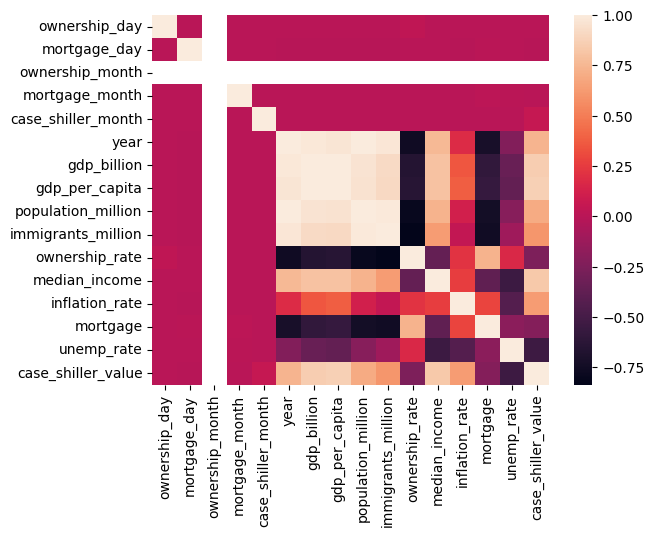

In [5]:
from seaborn import heatmap

heatmap(df.corr())

## Preparing data for Modeling

In [6]:
# splitting features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(47606, 15) (2506, 15) (47606,) (2506,)


In [8]:
# scaling data

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

## Modeling

In [9]:
input_dim = X_train.shape[1]
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.052, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/100
1411/1411 [==============================] - 6s 4ms/step - loss: 0.0263 - mean_absolute_error: 0.0891 - mean_squared_error: 0.0263 - val_loss: 0.0031 - val_mean_absolute_error: 0.0415 - val_mean_squared_error: 0.0031
Epoch 2/100
1411/1411 [==============================] - 5s 3ms/step - loss: 0.0017 - mean_absolute_error: 0.0315 - mean_squared_error: 0.0017 - val_loss: 0.0010 - val_mean_absolute_error: 0.0243 - val_mean_squared_error: 0.0010
Epoch 3/100
1411/1411 [==============================] - 4s 3ms/step - loss: 7.4127e-04 - mean_absolute_error: 0.0209 - mean_squared_error: 7.4127e-04 - val_loss: 7.9038e-04 - val_mean_absolute_error: 0.0218 - val_mean_squared_error: 7.9038e-04
Epoch 4/100
1411/1411 [==============================] - 4s 3ms/step - loss: 4.3915e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.3915e-04 - val_loss: 3.3433e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 3.3433e-04
Epoch 5/100
1411/1411 [=============================

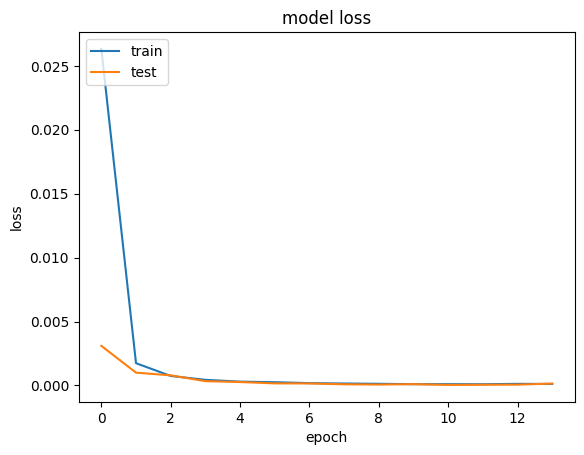

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {test_mae}")
print(f"Mean Squared Error: {test_mse}")

79/79 [==============================] - 0s 2ms/step - loss: 1.4158e-04 - mean_absolute_error: 0.0090 - mean_squared_error: 1.4158e-04
Mean Absolute Error: 0.009023926220834255
Mean Squared Error: 0.00014157866826280951


## Predictions

**Input Data for Prediction**

ownership_day: 10

mortgage_day: 29

ownership_month: 1

mortgage_month: 12

case_shiller_month: 12

year: 2022

gdp_billion: $ 25,462

gdp_per_capita: $ 76,398.5917

population_million: 338.289857

immigrants_million: 46.1015

ownership_rate: 65.9 %

median_income: $ 74580

inflation_rate: 8.0028 %

mortgage: 6.42 %

unemp_rate: 3.611 %

In [36]:
prediction = model.predict(scaler_X.transform(np.array([[10, 29, 1, 12, 12, 2022, 25462, 76398.5917, 338.46, 46.1015, 65.9, 74580, 8.0028, 6.42, 3.611]])))

1/1 [==============================] - 0s 42ms/step


In [37]:
prediction = scaler_y.inverse_transform(prediction) # case-shiller home price index

In [38]:
print(f'case-shiller home price index is {prediction[0][0]}')

case-shiller home price index is 297.26580810546875
